In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os
from keras.applications.vgg16 import VGG16
import keras
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [4]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
traindir ="../content/drive/MyDrive/t learning/dataset/train"
validdir = "../content/drive/MyDrive/t learning/dataset/validate"
testdir = "../content/drive/MyDrive/t learning/dataset/test"

In [6]:
#data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 7
training_set = train_datagen.flow_from_directory(traindir,
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(validdir,
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')


Found 28 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [7]:
class_dict = training_set.class_indices
print(class_dict)

{'healthy': 0, 'stalkborer': 1}


In [8]:
li = list(class_dict.keys())
print(li)

['healthy', 'stalkborer']


In [9]:
train_num = training_set.samples
valid_num = valid_set.samples

In [10]:
base_model=VGG16(include_top=False,input_shape=(224,224,3))
base_model.trainable=False

58889256/58889256 [==============================] - 0s 0us/step


In [11]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(2,activation='softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 2)                 50178     
                                                                 
Total params: 14764866 (56.32 MB)
Trainable params: 50178 (196.01 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [13]:
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Check the values of train_num and batch_size
print("Number of training samples:", train_num)
print("Batch size:", batch_size)

Number of training samples: 28
Batch size: 7


In [15]:
# Handle potential issues
if train_num == 0:
    raise ValueError("Your training set is empty. Please check your data loading process.")

if batch_size > train_num:
    batch_size = train_num // 2  # Or any other suitable value smaller than train_num
    print("Adjusted batch size to:", batch_size)

In [16]:
#fitting images to CNN
history = classifier.fit(training_set,
                         steps_per_epoch=train_num//batch_size,
                         validation_data=valid_set,
                         epochs=5,
                         validation_steps=valid_num//batch_size,
                         )
#saving model
#filepath="Mymodel.hdf5"
#model.save(filepath)

Epoch 1/5
4/4 [==============================] - 35s 8s/step - loss: 1.8144 - accuracy: 0.6071 - val_loss: 1.4948 - val_accuracy: 0.8571
Epoch 2/5
4/4 [==============================] - 32s 8s/step - loss: 1.4395 - accuracy: 0.8571 - val_loss: 0.7755 - val_accuracy: 0.8571
Epoch 3/5
4/4 [==============================] - 32s 8s/step - loss: 0.9564 - accuracy: 0.7143 - val_loss: 0.4083 - val_accuracy: 0.7143
Epoch 4/5
4/4 [==============================] - 32s 8s/step - loss: 0.2999 - accuracy: 0.8571 - val_loss: 0.6171 - val_accuracy: 0.7143
Epoch 5/5
4/4 [==============================] - 27s 6s/step - loss: 0.6113 - accuracy: 0.8571 - val_loss: 0.9497 - val_accuracy: 0.7143


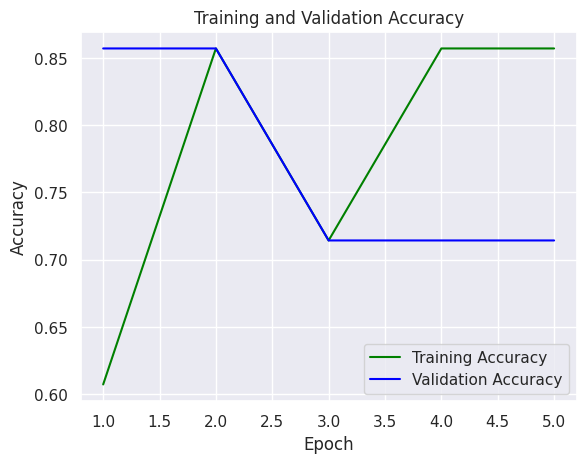

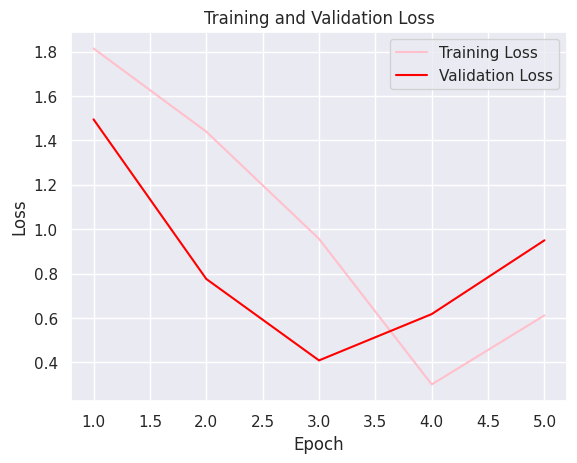

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Following is the prediction:
1/1 [==============================] - 1s 756ms/step


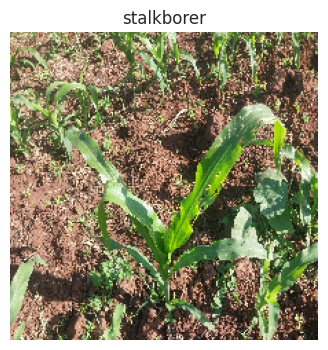

In [18]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "../content/drive/MyDrive/t learning/dataset/test /stalkborer/Maize_stalkborer 23.jpg"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is the prediction:")
prediction = classifier.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#ploting image with predicted class name
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()